Fernandez, John Carlo P.

#Assignment 4.1 Mood Detection with OpenCV

In [1]:
#import libraries
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from shutil import copyfile
import random
import keras

from sklearn.model_selection import train_test_split
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalAveragePooling2D, Dense, Conv2D, Input, MaxPooling2D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam, RMSprop

In [2]:
#directories
try:
    os.mkdir('D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset')

    os.mkdir('D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/training')
    os.mkdir('D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/test')
    
    #training
    os.mkdir('D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/training/Happy')
    os.mkdir('D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/training/Angry')
    os.mkdir('D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/training/Sad')
    os.mkdir('D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/training/Confused')
    os.mkdir('D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/training/Shocked')

    #test
    os.mkdir('D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/test/Happy')
    os.mkdir('D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/test/Angry')
    os.mkdir('D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/test/Sad')
    os.mkdir('D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/test/Confused')
    os.mkdir('D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/test/Shocked')
except OSError:
    print('Error failed to make directory')

In [3]:
# Original directories
Happydir_JC= 'D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/OG Dataset/Happy'
Angrydir_JC= 'D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/OG Dataset/Angry'
Saddir_JC= 'D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/OG Dataset/Sad'
Confuseddir_JC= 'D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/OG Dataset/Confused'
Shockeddir_JC= 'D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/OG Dataset/Shocked'

# Training directories
Training_dir = 'D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/training'

# Training of each category
Training_happy = os.path.join(Training_dir, 'Happy/')
Training_sad = os.path.join(Training_dir, 'Sad/')
Training_angry = os.path.join(Training_dir, 'Angry/')
Training_confused = os.path.join(Training_dir, 'Confused/')
Training_shocked = os.path.join(Training_dir, 'Shocked/')

# Define whether to include test split or not
INCLUDE_TEST = True

In [4]:
print('Training:')
print('Happy images:', len(os.listdir('D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/training/Happy')))
print('Sad images:', len(os.listdir('D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/training/Angry')))
print('Angry images:', len(os.listdir('D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/training/Sad')))
print('Confused images:', len(os.listdir('D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/training/Confused')))
print('Confused images:', len(os.listdir('D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/training/Shocked')))

print('\n \nTest:')
print('Happy images:', len(os.listdir('D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/test/Happy')))
print('Sad images:', len(os.listdir('D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/test/Angry')))
print('Angry images:', len(os.listdir('D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/test/Sad')))
print('Confused images:', len(os.listdir('D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/test/Confused')))
print('Confused images:', len(os.listdir('D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/test/Shocked')))



Training:
Happy images: 0
Sad images: 0
Angry images: 0
Confused images: 0
Confused images: 0

 
Test:
Happy images: 0
Sad images: 0
Angry images: 0
Confused images: 0
Confused images: 0


In [5]:
def split_data(main_dir, training_dir, test_dir=None, include_test_split = True,  split_size=0.9):

    files = []
    for file in os.listdir(main_dir):
        if  os.path.getsize(os.path.join(main_dir, file)): # check if the file's size isn't 0
            files.append(file) # appends file name to a list

    shuffled_files = random.sample(files,  len(files)) # shuffles the data
    split = int(split_size * len(shuffled_files)) #the training split casted into int for numeric rounding

    train = shuffled_files[:split] #training split

    if include_test_split:
        test = shuffled_files[split:]
    else:
        test = None

    for element in train:
        copyfile(os.path.join(main_dir, element), os.path.join(training_dir, element))  # copy files to training directory

    if include_test_split:
        for element in test:
            copyfile(os.path.join(main_dir, element), os.path.join(test_dir, element))  # copy files to test directory

    print("Split successful!")

In [6]:
split_data(Happydir_JC, Training_happy, 'D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/test/Happy', INCLUDE_TEST, 0.80)
split_data(Angrydir_JC, Training_angry, 'D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/test/Angry', INCLUDE_TEST, 0.80)
split_data(Saddir_JC, Training_sad, 'D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/test/Sad', INCLUDE_TEST, 0.80)
split_data(Confuseddir_JC, Training_confused, 'D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/test/Confused', INCLUDE_TEST, 0.80)
split_data(Shockeddir_JC, Training_shocked, 'D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/test/Shocked', INCLUDE_TEST, 0.80)

Split successful!
Split successful!
Split successful!
Split successful!
Split successful!


In [7]:
from keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters (assuming you want the same for training and test)
datagen = ImageDataGenerator(
    rescale=1/255.,
    zoom_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
)

# Training data generator
train_gen = datagen.flow_from_directory(
    'D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/training',
    target_size=(150, 150),
    subset="training",
    batch_size=32
)

# For test data
test_gen = ImageDataGenerator(rescale=1/255.).flow_from_directory(
    'D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/Mood Detection/dataset/test',
    target_size=(150, 150),
    batch_size=32
)

Found 215 images belonging to 5 classes.
Found 55 images belonging to 5 classes.


Data Augmentation: Training images


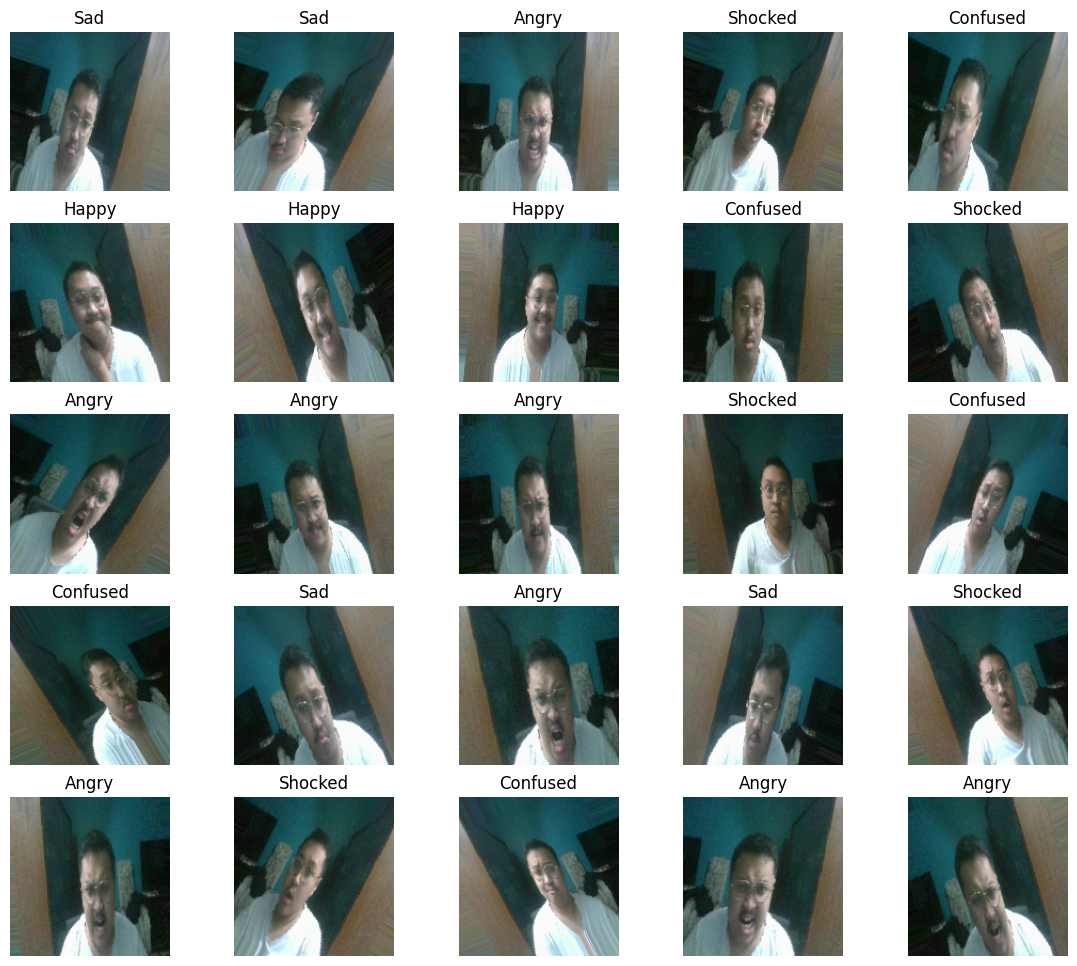

In [8]:
class_names = ['Angry', 'Confused', 'Happy', 'Sad', 'Shocked']

import matplotlib.pyplot as plt
import numpy as np

# Image Samples
print('Data Augmentation: Training images')
img, label = next(train_gen)

plt.figure(figsize=[14, 12])
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title(class_names[np.argmax(label[i])])
plt.show()

In [9]:
#Data Training
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D
from keras.applications import VGG16

# Assuming train_gen and valid_gen are your image data generators

class_count = len(list(train_gen.class_indices.keys()))

In [10]:
## Create the model
model = Sequential()

model.add(Conv2D(32, (3, 3), strides=(1, 1),
                 input_shape=(150,150,3), activation='leaky_relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (4, 4), strides=(1, 1), activation='leaky_relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), strides=(1, 1), activation='leaky_relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), strides=(1, 1), activation='leaky_relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='leaky_relu'))

model.add(Dense(class_count, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 33, 33, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define filepath to save the best model
filepath = 'RecogMood3.h5'

In [16]:
## Checks of the val_accuracy imporved after 5 epochs, then stops if no improvement found
early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

# Create ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# Train the model with the added callback
history = model.fit(
    train_gen,
    epochs=50,
    validation_data=test_gen,
    callbacks=[checkpoint]
)

Epoch 1/50
7/7 [==============================] - ETA: 0s - loss: 1.5884 - accuracy: 0.2186
Epoch 1: val_accuracy improved from -inf to 0.40000, saving model to RecogMood3.h5
7/7 [==============================] - 17s 2s/step - loss: 1.5884 - accuracy: 0.2186 - val_loss: 1.5203 - val_accuracy: 0.4000
Epoch 2/50
7/7 [==============================] - ETA: 0s - loss: 1.5870 - accuracy: 0.2791
Epoch 2: val_accuracy did not improve from 0.40000
7/7 [==============================] - 14s 2s/step - loss: 1.5870 - accuracy: 0.2791 - val_loss: 1.5112 - val_accuracy: 0.2182
Epoch 3/50
7/7 [==============================] - ETA: 0s - loss: 1.4702 - accuracy: 0.3721
Epoch 3: val_accuracy improved from 0.40000 to 0.58182, saving model to RecogMood3.h5
7/7 [==============================] - 13s 2s/step - loss: 1.4702 - accuracy: 0.3721 - val_loss: 1.2211 - val_accuracy: 0.5818
Epoch 4/50
7/7 [==============================] - ETA: 0s - loss: 1.2435 - accuracy: 0.4744
Epoch 4: val_accuracy improved 

In [17]:
## plot the graph
def plot_loss_accuracy(history, name):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

    plt.suptitle(name)

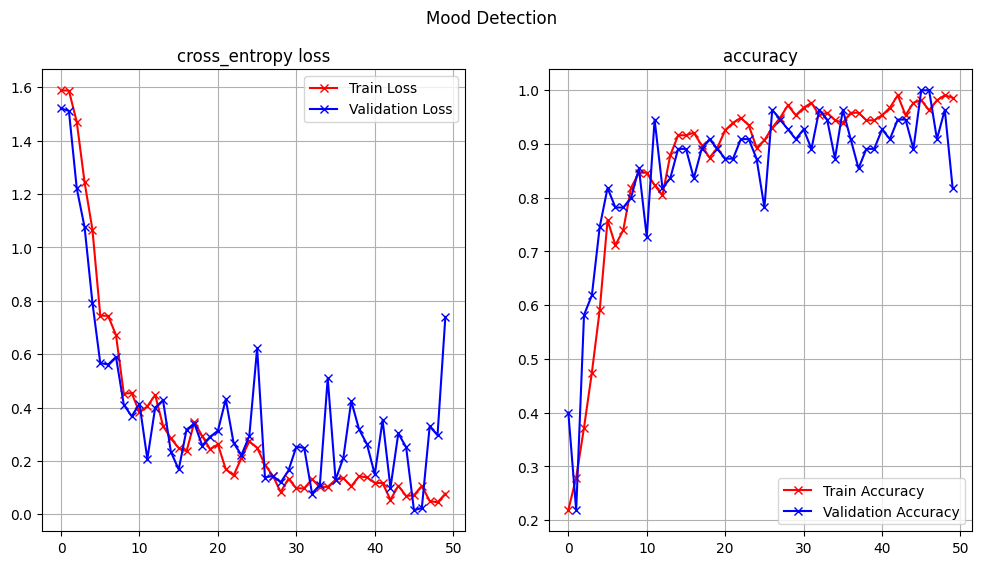

In [18]:
plot_loss_accuracy(history, 'Mood Detection')

In [19]:
test_loss, test_acc = model.evaluate(test_gen)
print('Test accuracy:', test_acc)

2/2 [==============================] - 2s 632ms/step - loss: 0.7394 - accuracy: 0.8182
Test accuracy: 0.8181818127632141


In [3]:
import cv2
from keras.models import load_model

image_path = 'D:\FILES\ACADS\TIP\DATASCIE 3\HOA 4.1\Mood Detection\OG Dataset\Shocked\Shocked (22).jpg'
test_model = load_model('RecogMood1.h5')

def load_and_preprocess_image(image_path, target_size=(150, 150)):
  img = cv2.imread(image_path)
  img = cv2.resize(img, target_size)
  img = img.astype('float32') / 255.0  # Normalize pixel values
  return img

preprocessed_img = load_and_preprocess_image(image_path)
preprocessed_img = np.expand_dims(preprocessed_img, axis=0)

predictions = test_model.predict(preprocessed_img)
predicted_class = np.argmax(predictions[0])

class_labels = ['Angry', 'Confused', 'Happy', 'Sad' , 'Shocked']

predicted_class = np.argmax(predictions[0])
predicted_label = class_labels[predicted_class]

# Load the image using OpenCV
img = cv2.imread(image_path)

def detect_face(image):
  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

  # Convert the image to grayscale (Haar cascades work better with grayscale images)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

  # Check if any faces were detected
  if len(faces) > 0:
    (x, y, w, h) = faces[0]
    return (x, y, w, h)
  else:
    # No face detected, return None
    return None

face_box = detect_face(img.copy())

# Add predicted label as text on the image with a bounding box around it
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.7
font_thickness = 2
text_color = (0, 255, 0)
box_color = (0, 0, 255)

(text_width, text_height) = cv2.getTextSize(predicted_label, font, font_scale, font_thickness)[0]

if face_box is not None:
  text_offset_x = face_box[0] + 10  # Place text next to the face box
  text_offset_y = face_box[1] + face_box[3] - 10  # Place text below the face box

  cv2.rectangle(img, (face_box[0], face_box[1]), (face_box[0] + face_box[2], face_box[1] + face_box[3]), box_color, 2)

  # Ensure text doesn't go out of image bounds
  if text_offset_x + text_width > img.shape[1]:
    text_offset_x = img.shape[1] - text_width - 10

  cv2.rectangle(img, (text_offset_x - 5, text_offset_y - text_height - 5),
                (text_offset_x + text_width + 5, text_offset_y + 5),
                (0, 0, 0), cv2.FILLED)

  # Add the label text
  cv2.putText(img, predicted_label, (text_offset_x, text_offset_y), font,
              font_scale, text_color, font_thickness)

cv2.imshow("Mood Detection", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 12s 12s/step


KeyboardInterrupt: 

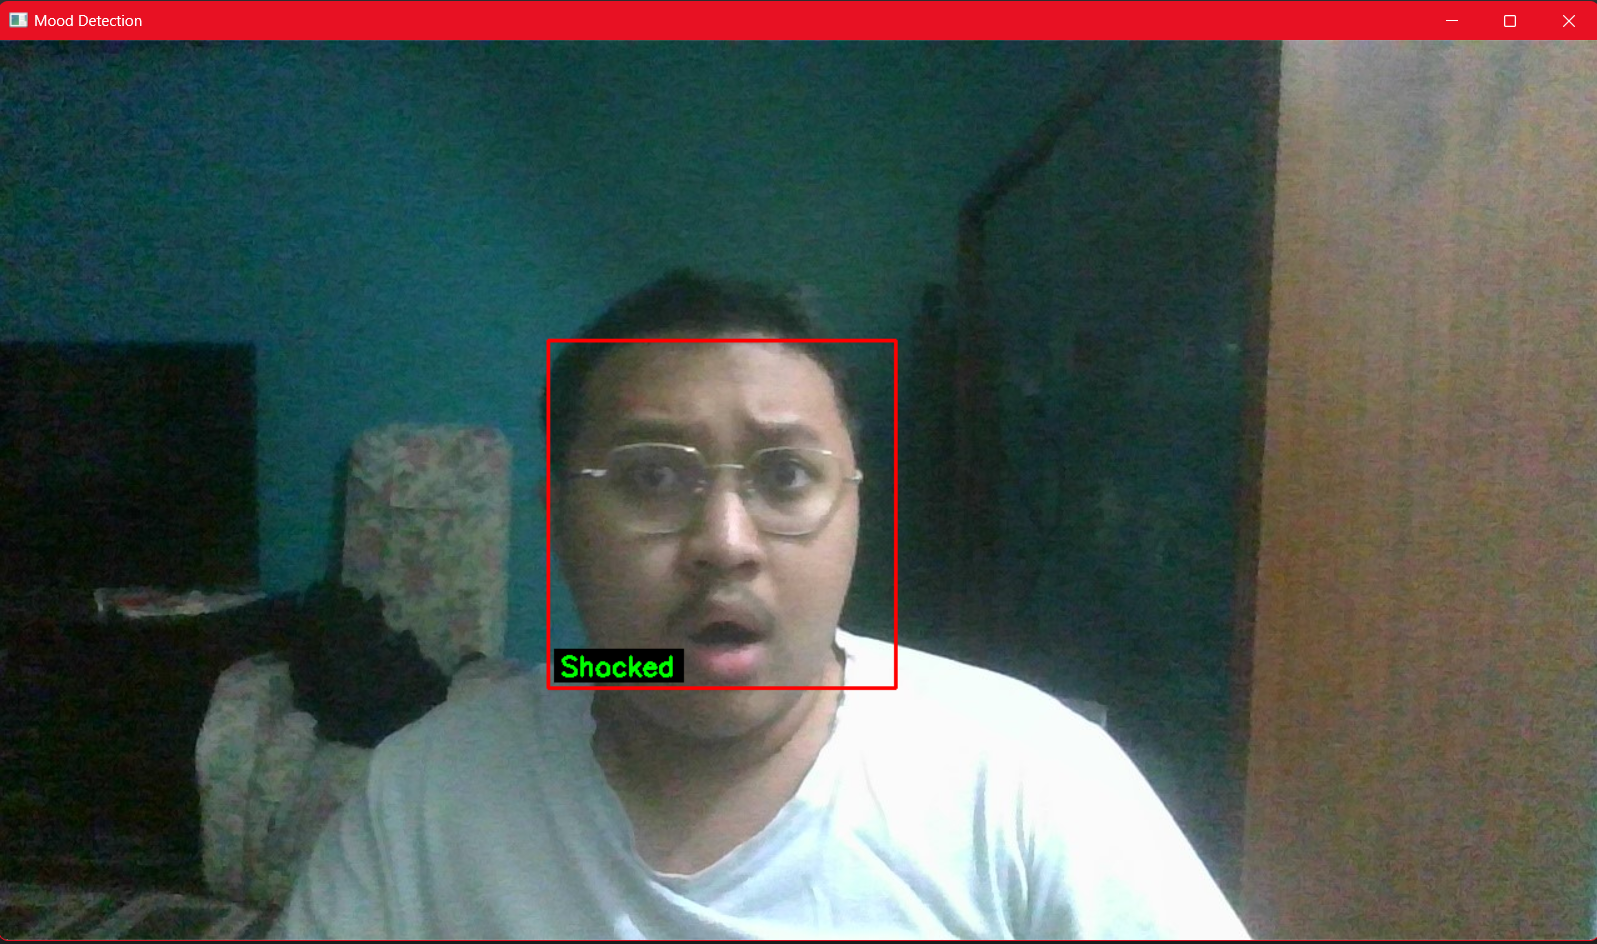

In [2]:
import cv2
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Path to your dataset
dataset_path = 'D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/JC_Recognition/JCF'

# Load the OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the OpenCV pre-trained model for face recognition
model = cv2.dnn.readNetFromTorch('D:/FILES/ACADS/TIP/DATASCIE 3/HOA 4.1/JC_Recognition/openface.nn4.small2.v1.t7')

# Function to get the face embedding
def get_embedding(face):
    face_blob = cv2.dnn.blobFromImage(face, 1.0 / 255, (96, 96), (0, 0, 0), swapRB=True, crop=False)
    model.setInput(face_blob)
    vec = model.forward()
    return vec

# Prepare training data: Compute embeddings for known faces
known_embeddings = []
for filename in os.listdir(dataset_path):
    img_path = os.path.join(dataset_path, filename)
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)
    
    for (x, y, w, h) in faces:
        face = image[y:y+h, x:x+w]
        face = cv2.resize(face, (96, 96))
        embedding = get_embedding(face)
        known_embeddings.append(embedding)

# Average the embeddings to create a single representation
average_embedding = np.mean(known_embeddings, axis=0)

# Function to recognize face
def recognize_face(face_embedding):
    score = cosine_similarity(face_embedding, average_embedding)
    if score >= 0.5:  # Set threshold for recognition
        return "JCF"
    else:
        return "Unknown"

# Start webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)
    
    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]
        face = cv2.resize(face, (96, 96))
        face_embedding = get_embedding(face)
        label = recognize_face(face_embedding)
        
        # Draw rectangle around the face and put label
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

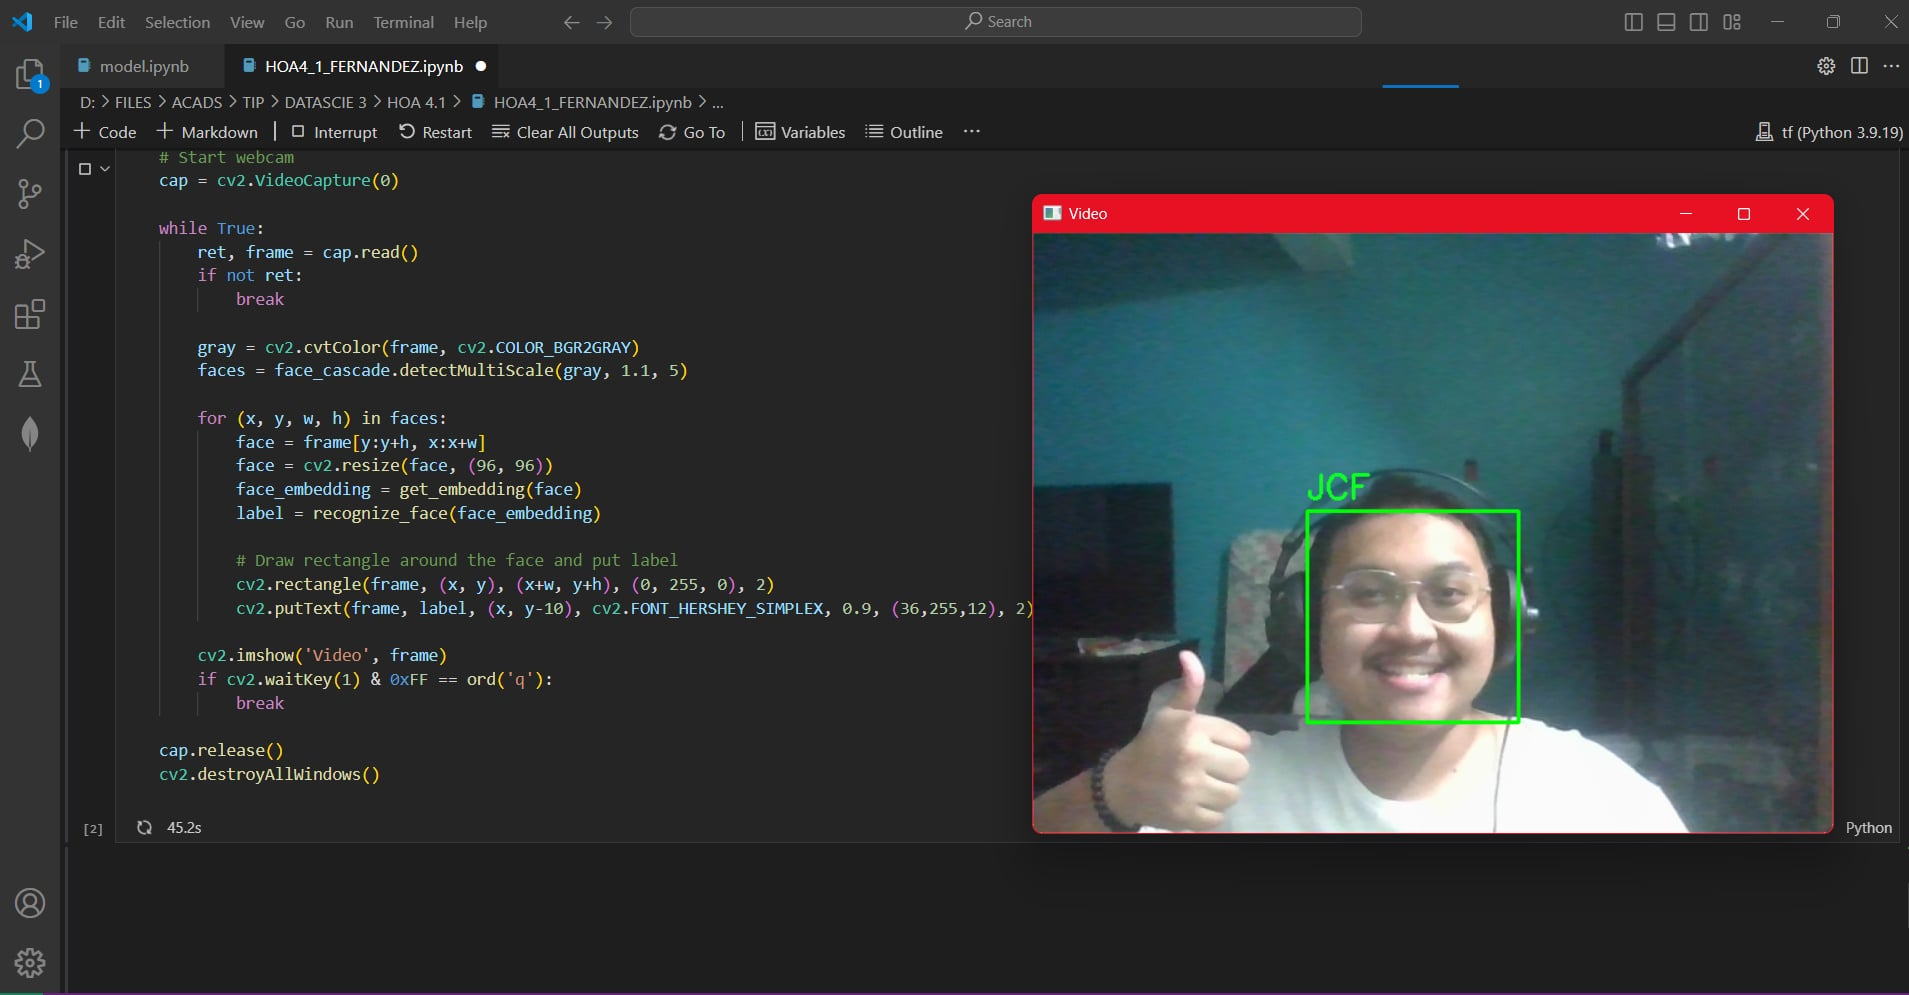